In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [3]:
iat = [col for col in df.columns if 'IAT' in col]
df.rename(columns={col:col.replace('PCIAT', 'IAT') for col in iat}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
df_num = df.select_dtypes(exclude='object')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Waist_Circumference            898 non-null    float64
 7   Physical-Diastolic_BP                   2954 non-null   float64
 8   Physical-HeartRate                      2967 non-null   float64
 9   Physical-Systolic_BP                    2954 non-null   float64
 10  Fitness_Endurance-Max_Stage             743 non-null    floa

### **VISUALIZE HEATMAP CORRELATION EACH VARIABLE TO LABEL**

In [7]:
sii = 'sii'

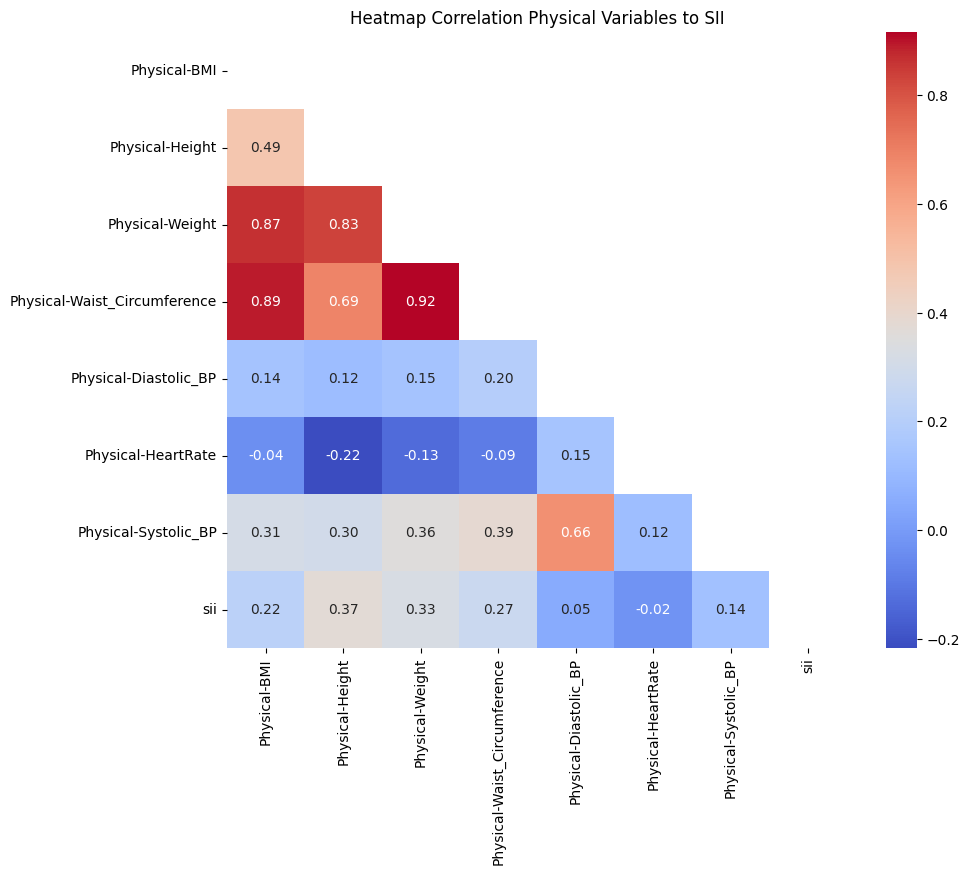

In [8]:
# physical columns 
physical_cols = [col for col in df_num.columns if 'physical' in col.lower()]
physical_cols.append(sii)
plt.figure(figsize=(10, 8))
corr = df_num[physical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Physical Variables to SII')
plt.show()

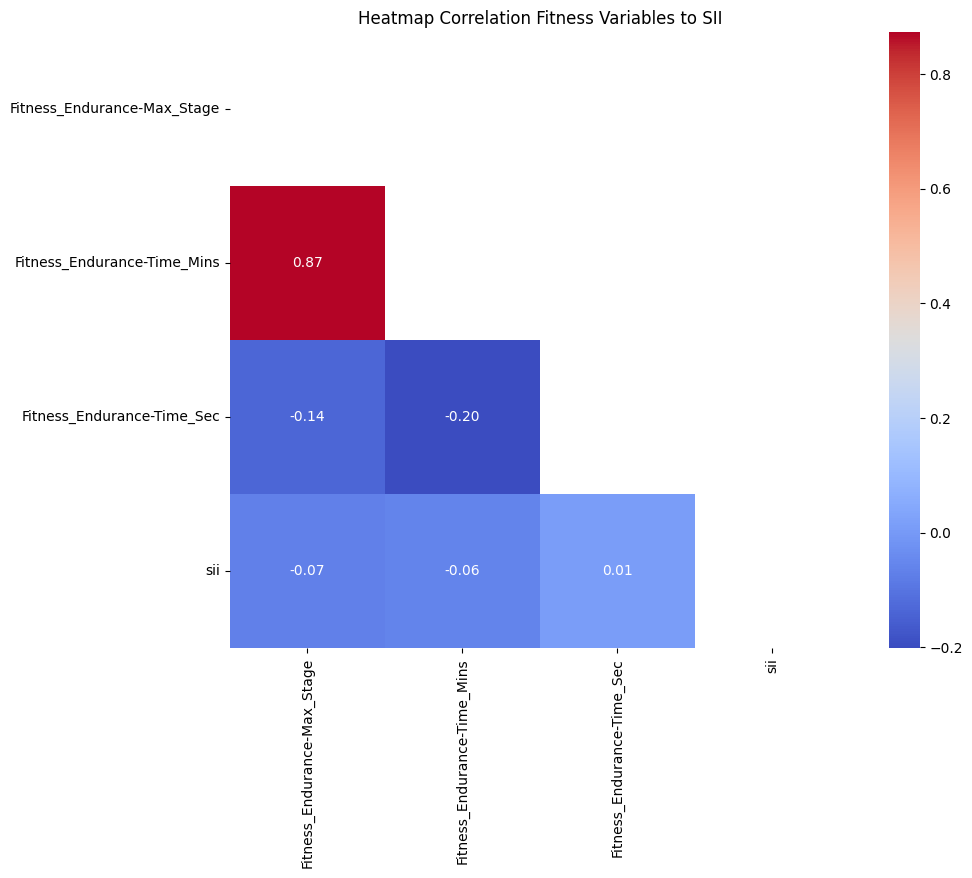

In [9]:
#fitness columns
fitness_cols = [col for col in df_num.columns if 'fitness' in col.lower()]
fitness_cols.append(sii)
plt.figure(figsize=(10, 8))
corr = df_num[fitness_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Fitness Variables to SII')
plt.show()

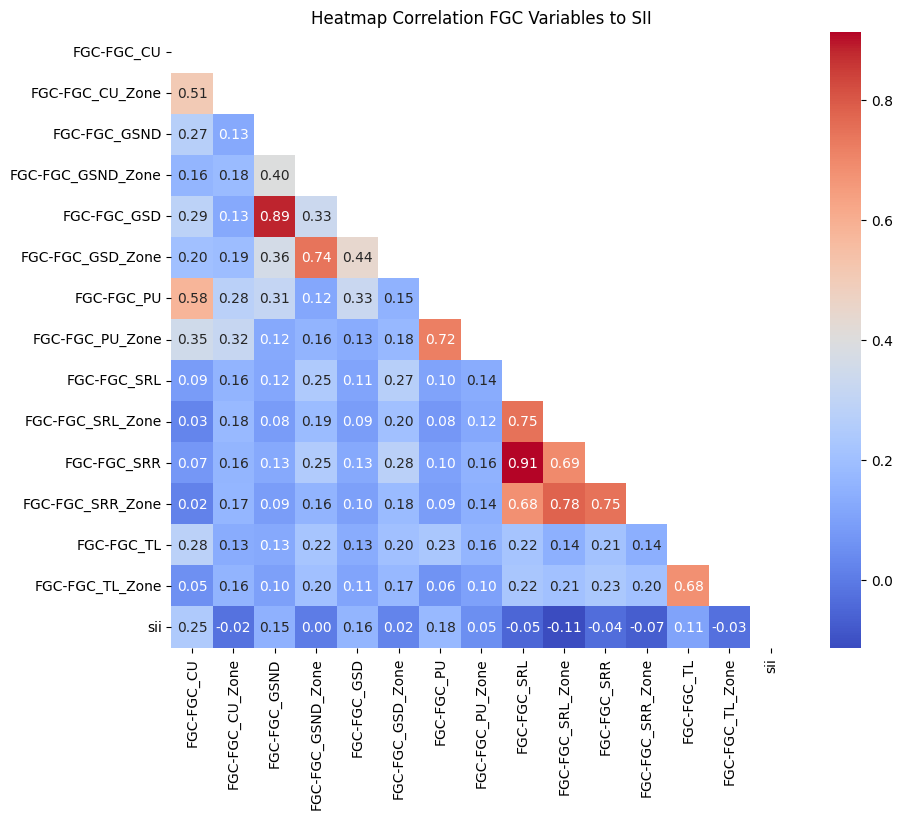

In [10]:
# fgc columns 
fgc_cols = [col for col in df_num.columns if 'fgc' in col.lower()]
fgc_cols.append(sii)
plt.figure(figsize=(10, 8))
corr = df_num[fgc_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation FGC Variables to SII')
plt.show()

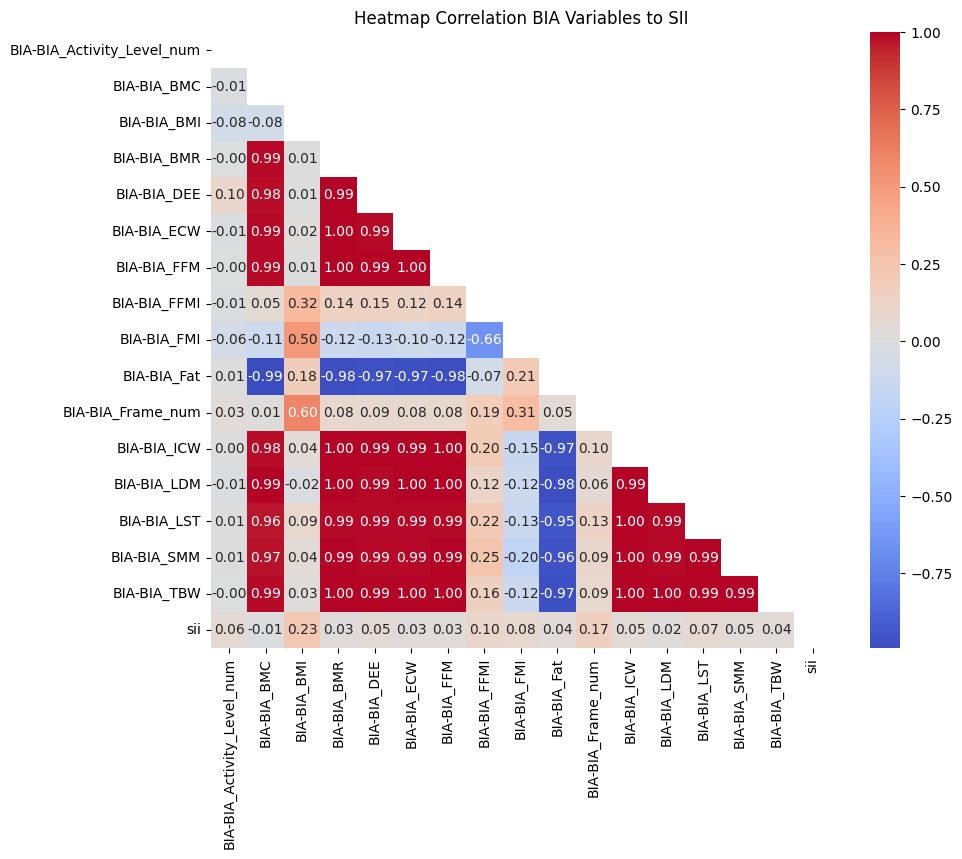

In [11]:
# bia col 
bia_cols = [col for col in df_num.columns if col.lower().startswith('bia')]
bia_cols.append(sii)
plt.figure(figsize=(10, 8))
corr = df_num[bia_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation BIA Variables to SII')
plt.show()

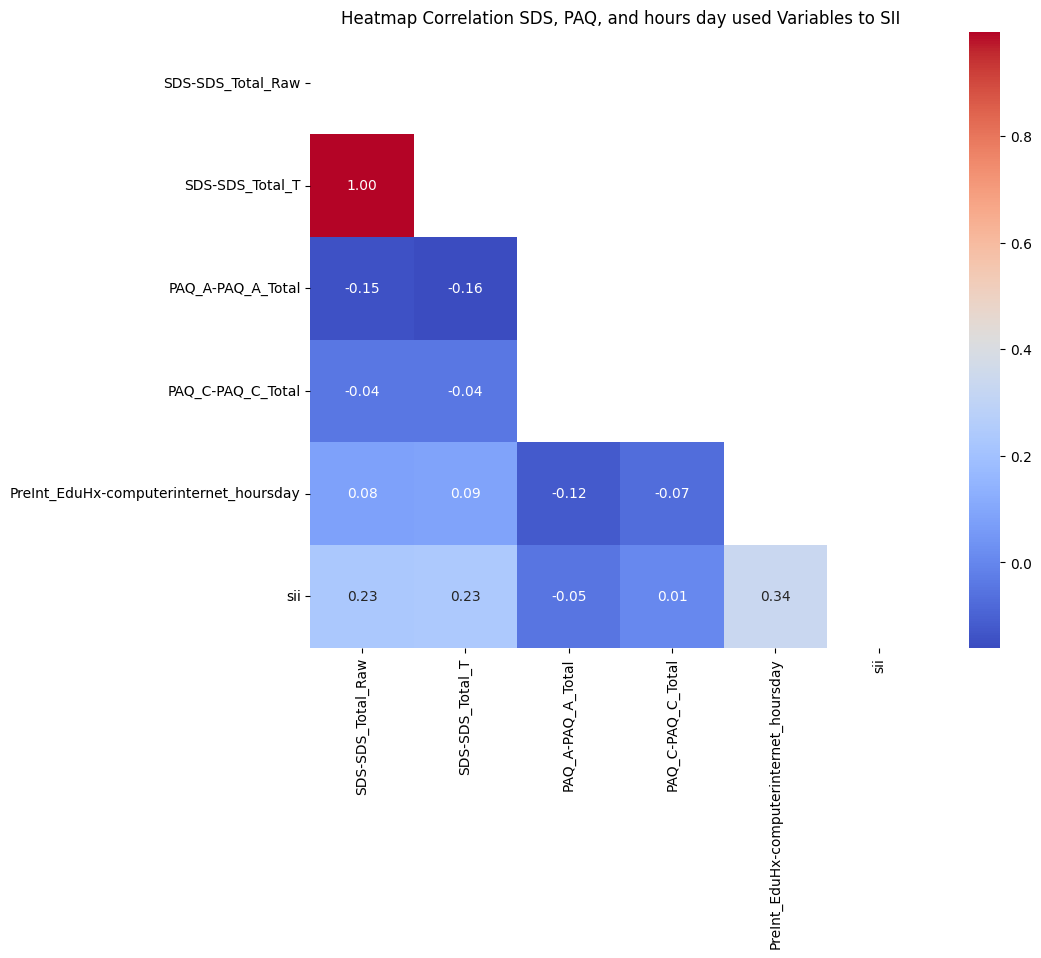

In [18]:
# sds col 
sds_cols = [col for col in df_num.columns if col.lower().startswith('sds')]
paq_cols = [col for col in df_num.columns if col.lower().startswith('paq')]
sds_cols.extend(paq_cols)
sds_cols.append('PreInt_EduHx-computerinternet_hoursday')
sds_cols.append(sii)
plt.figure(figsize=(10, 8))
corr = df_num[sds_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation SDS, PAQ, and hours day used Variables to SII')
plt.show()